In [1]:
import pyvisa

In [2]:
rm = pyvisa.ResourceManager()

In [3]:
rm

<ResourceManager(<IVIVisaLibrary('C:\\Windows\\system32\\visa32.dll')>)>

In [4]:
rm.list_resources()

('USB0::0x2A8D::0xB318::MY58330121::INSTR',
 'ASRL1::INSTR',
 'ASRL5::INSTR',
 'ASRL10::INSTR')

In [5]:
multimeter = rm.open_resource("USB0::0x2A8D::0xB318::MY58330121::INSTR")

In [6]:
multimeter

<'USBInstrument'('USB0::0x2A8D::0xB318::MY58330121::0::INSTR')>

In [7]:
multimeter.query("*IDN?")

'Keysight Technologies,34450A,MY58330121,01.02-01.00\n'

In [8]:
from pyvisa.constants import StopBits, Parity

In [9]:
multimeter.query("MEASure:RESistance?")

'+7.96323533E+02\n'

In [16]:
multimeter.write("CONFigure:RESistance 1000")
multimeter.query("READ?")

'+7.39165634E+02\n'

In [17]:
import serial
import serial.tools.list_ports
for i in serial.tools.list_ports.comports():
    print(i)

COM10 - Устройство с последовательным интерфейсом USB (COM10)
COM1 - Последовательный порт (COM1)


In [18]:
rpi = serial.Serial(port="COM10", baudrate=115200)

In [21]:
rpi.write(str.encode("T?\n"))
rpi.readline().decode().strip()

'71.7897'

In [22]:
import matplotlib.pyplot as plt
datas = []
for i in range(100):
    rpi.write(str.encode("T?\n"))
    datas.append(float(rpi.readline().decode().strip()))

Matplotlib is building the font cache; this may take a moment.


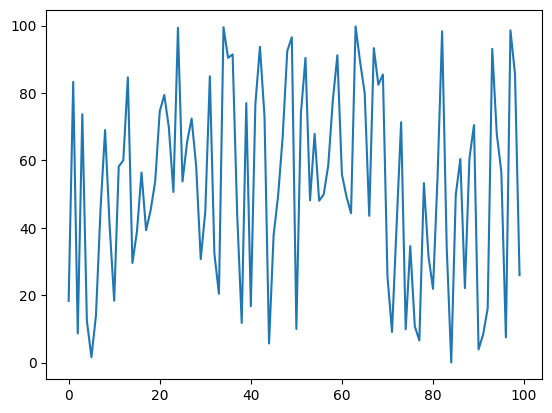

In [23]:
plt.plot(datas)